#  Multiple Linear Regression Analysis

 Linear Regression is an important and easy to understand technique among all the machine learning algorithms. In this notebook, I made an attempt to cover the critical steps involved in the regression analysis. Along with the steps, intuition behind assumptions and the general procedure are covered. Note that, this notebook is an adaption of the content from a well known book "Introduction to Statistical Learning" available at http://www-bcf.usc.edu/~gareth/ISL/ for free.

### Simplified Concept

The idea of Linear Regression is to find Y or the dependent variables,given a bunch of variables. For example, Price of House =  2*(No of Bedrooms) + 3*(Distance from nearest Wallmart)+Constant is an equation describing the relationship between the number of bedrooms, wallmart distance and the price of house. It does not have a sqaure terms. It means that , if you know the bedroom count and distance from wallmart- with a resonable confidence we can estimate the price of the house.


### Problem Definition

Any firm wants to sell higher volume of product units. In order to that, marketing is necessary. The marketing team would do advertising in TV, Radio and Newspaper to increase the awareness of the product. However, any firm would have limited budget for advertising. In the recent years, the firm has already been spending money on these channels (TV, Radio and Newspapers) and they have corresponding sales. Our goal is to devise a strategy to distribute this marketing budget.

### Data Set

The dataset "Advertising.csv" can be downloaded from here : http://www-bcf.usc.edu/~gareth/ISL/data.html

### Exploratory Analysis

In the exploratory analysis, the below steps are to be followed:

1. Open the file and check , the nature of data and the separators involved. Trust me , this step sounds silly - but you can save a lot of time sometimes by just opening the file and checking the contents

2. For each feature (or column), check the data distribution and descriptive stats like mean, median

3. Find out for potential missing values in the data set. Decide a missing value imputation strategy. Remember, sometimes data missing in a pattern itself would be critical information

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_table("C:/Users/Owner/Desktop/Advertising.csv",sep=",",index_col=0)

In [11]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


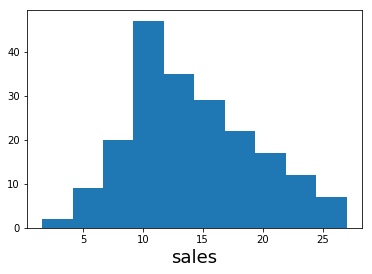

In [49]:
plt.hist(df["sales"])
plt.xlabel("sales",fontsize = 18)

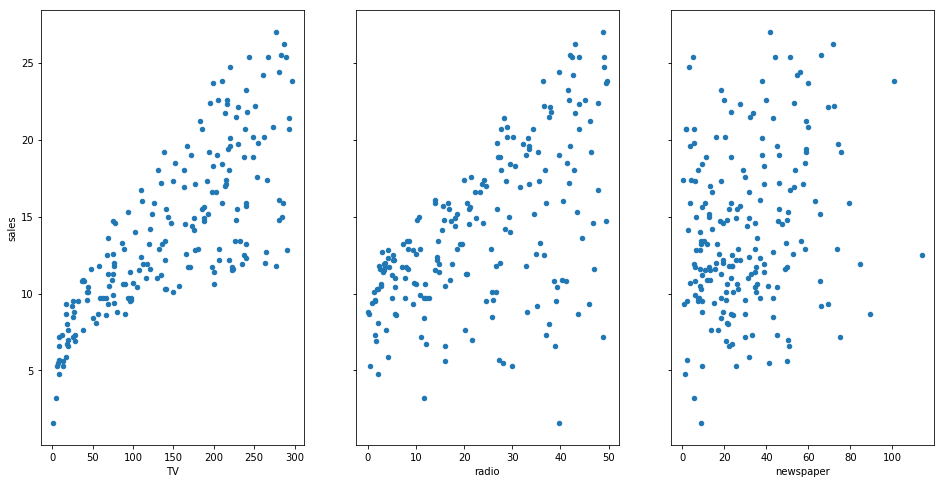

In [52]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

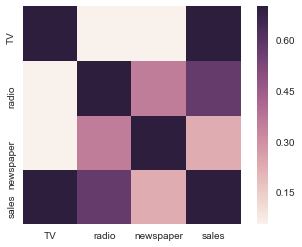

In [65]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()


In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 15 Oct 2017   Prob (F-statistic):           1.58e-96
Time:                        17:13:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### How should the summary be analzyed ?

1. **Significance of the Regression:** The first and foremost thing to look at is the p-value against the F test. If the p-valve is not less than .05, then it means that the entire regression analysis can be discarded. Basically, it means that the null hypothesis (co-efficients = 0) must be accepted that eventually leads to discarding all the co-efficients

2. **Check the p-values of the co-efficients:** If the p-values of the co-efficients are greater than .05 then it means that the corresponding co-efficients are not significant and can be discarded. They have no impact on the dependent variable. In this use case, ***the newspaper variable is not significant***. Hence, that variable needs to be omitted.

3. **R^2 Value:**The R^2 value should be high. It denotes the total variance in dependent variable that is explained by the independednt variables. Here in this model , it is 89.7 which is a very good measure. On a separate note, if you are comparing different models then one should use adjusted R^2 - as adjusted R^2 considers the number of variables used for the analysis

### Business Interpretation:

The equation of the line becomes  ** Sales(in 1000 units) = 2.94 + .05 * TV + .19 * Radio **

1. For every 1000 dollar increase in TV marketing budget, there is an **average** increase of 50 units (.05 *1000) in sale
2. Similarly for every 1000 dollar increase in Radio marketing budget , there is a **average** of 190 unit increase in sale
3. In this particular use case, if there is no marketing spend at all , the sales would be 2940. A word of caution here, the intercept needs to be understood with a reference value. In this case, the average sales value with marketing is around 14000 units, hence the value 2940 units is a realistic figure without marketing

### Testing the Assumptions:

Briefly, the assumptions of linear regressions can be stated as below:

1. The dependent and independent variables share a linear and additive relationship

2. The error terms are random, statistically independent, normally distributed and have a constant variance (homoskedasticity)

3. The dependent variables are not multi-collinear

**1.Linear Relationship Assumption**

**Diagnosis:** Plot the residuals and fitted values. The graph should exhibit no pattern (U shaped or inverted U-shaped). If there is a pattern, then variable transformations should be done or may be a polynomial model should be fitted

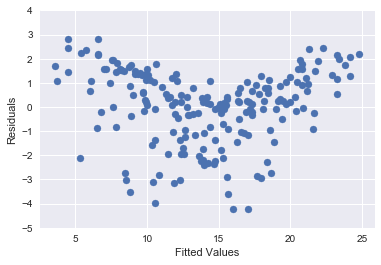

In [78]:
fittedvalues = lm.fittedvalues
residuals = lm.resid
plt.scatter(fittedvalues,residuals)
plt.ylim(-5,4)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

**Conclusion:** Definitely, there is a pattern above. Either an interaction term or a higher order term for any variable may be included in the model. Since, this notebook is for demonstration only, we proceed with the same model and check other assumptions

**Independent Errors with constant variance: ** For this plot all the residuals in the order of the observations. If you find consequetive errors having same values, then the errors are not independent. And also for constant variance, a plot with fitted values on x axis and residuals on Y axis should not have a funnel shape. If there is a funnel shape, then there is heteroskedasticity.

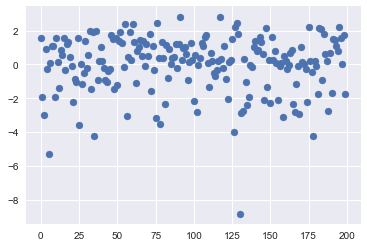

In [80]:
plt.scatter(range(0,200),residuals)

**Conclusion**: From the above two graphs, we can say that constant error variance and independent errors assumption is satisfied

**3.Multi Collinearity:** The simple way to check for multi collinearity is to have a correlation matrix and check, if two variables are interacting with each other. Another more robust way is to check for the "Variance Inflation Factor" for each variable. Here, we check the correlation matrix

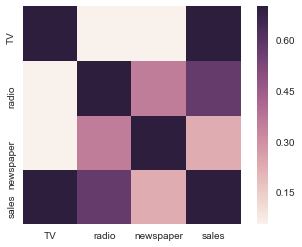

In [85]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix, vmax=.7, square=True)

**Conclusion:** Cleearly, Radio variable and Newspaper variable are collinear. Hence, one of them needs to be taken out from the analysis. For the same reason, Newspaper variable did not come out as a significant one when we checked the p -values. Hence, our assumption checks and the outputs are in sync

**Final Takeaways:** 
1. It is essential to read the numbers with a business sense in mind. In our case, we got the TV and Radio as significant variables affecting sales. That does not mean that we do not advertise at all in the newspapers.  We might be losing a segment all together, if that decision is taken.

2. The conclusion here is that the above model may not be used directly. Our assumptions on multi collinearity and error independence failed. Hence, we need to devise another model with an interaction term to accurately predict the sales and co-efficients.

3. For now, what we can guage is that the Radio is a higher impact medium than TV, keeping everything else constant.

4. Do not get carried away with the point estimates. When you subsitute the x-values, you would get a predicted y-value. This is a point estimate or an average value. A better way to use the analysis is to consider the range of y - values using the formula, range of y values = point estimate + or - 2 * Standard Error of Regression * Critical t -value